# Driver Performance at Each Circuit 

<font size = 5> By Leonard Henshaw, Robyn Jin, and Shannon Zhang

## Introduction

<font size = "3">

The Formula One World Championship, also known as F1, is the most popular single-seat auto racing competition, with each season being comprised of a series of races called Grands Prix. It is held by the Fédération Internationale de l'Automobile (FIA) and owned by the Formula One Group. The competition first took place in 1950 and has since become the most well-known form of racing. The term "formula" refers to a set of rules that all cars must adhere to. The races take place in many countries all over the world on various circuits or closed roads built specifically for racing. The point system used at Grands Prix determines two annual championships, one for the individual drivers, and one for the constructors, or the teams. The objective of this project is to determine the relationship between the performance of the drivers and the circuit at which each race is held. 

We are interested in this question because studying various aspects of each race may reveal which circuits drivers tend to perform better at, which races are more competitive, and which races are more entertaining to watch. This analysis may provide information to spectators when determining which races to watch. 

This project uses four different datasets, `results`, `circuits`, `races`, and `lap_times`. By merging, cleaning, aggregating, and plotting the data, we were able to compare driver performance, as measured by the number of points won by each driver, the fastest lap speed, and the fastest overall result time, across different circuits. Our plots showed that the Losail International Circuit consistently hosted the best races, and that there appears to be a relationship between lap speed and the result/race finish time. We also noticed that certain circuits are more competitive and may, as a result, host more entertaining races. 

## Data Importation

<font size = "3">

The libraries below have been imported in order to analyze the data. `numpy` will be used for computations, `pandas` will be used for data manipulation, `matplotlib.pyplot` will be used to create visualizations, and `seaborn` will be used to graph categorical data. 

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<font size = "3">

The datasets used include results, circuits, races, and driver_standings. `results` contains 18 columns: resultId, raceId, driverId, constructorId, number, grid, position, positionText, positionOrder, points, laps, time, milliseconds, fastestLap, rank, fastestLapTime, fastestLapSpeed, and statusId. The dataset has 25,840 rows, for a total of 465,120 observations. `circuits` contains 9 columns: circuitId, circuitRef, name, location, country, lat, lng, alt, and url. The dataset has 77 rows, for a total of 693 observations. `races` has 18 columns: raceId, year, round, circuitId, name, date, time, url, fp1_date, fp1_time, fp2_date, fp2_time, fp3_date, fp3_time, quali_date, quali_time, sprint_date, and sprint_time. The dataset has 1,102 rows, for a total of 19,836 observations. `driver_standings` has 7 columns: driverStandingsId, raceId, driverId, points, position, positionText, and wins. The dataset has 33,902 rows, for a total of 237,314 observations. 

The raw dataset contains a large amount of data, thus there is a need to identify the relevant data and remove those that are irrelevant. `results` and `driver_standings` will be used to analyze the drivers' overall performance. `circuits` contains the information regarding the names of the Grands Prix locations. Finally, `races` will be used to connect the `results` and `driver_standings` datasets to the `circuits` dataset. 

In [2]:
# Import datasets

results_raw = pd.read_csv("data_raw/results.csv")
circuits_raw = pd.read_csv("data_raw/circuits.csv")
races_raw = pd.read_csv("data_raw/races.csv")
driver_standings_raw = pd.read_csv("data_raw/driver_standings.csv")


<font size = "3">

The "name" column in the `circuits` dataset and the "time" and "milliseconds" columns in the `results` dataset were renamed for clarification when analyzing the data. The "name" column was renamed to "circuit_name", "time" was renamed to "results_time", and "milliseconds" was renamed to "results_milliseconds" to give more information as to what each column describes. 

In [3]:
# Rename columns

circuits_rename = {"name":"circuit_name"}
circuits = circuits_raw.rename(columns = circuits_rename)

results_rename = {"time":"results_time", "milliseconds":"results_milliseconds"}
results = results_raw.rename(columns = results_rename)


## Data Manipulation

### Merging the Datasets

<font size = "3">

Having studied and renamed the four datasets, we will now merge the datasets together into one dataset that contains all of the relevant data. First, the `results` and `driver_standings` datasets were merged on the column "raceId". `races` was merged with this through the column "raceId", and `circuits` was merged last, on the column "circuitId". This created the `formula1_merge` dataset, with 836,301 rows and 6 columns. The selected columns were raceId, results_milliseconds, fastestLapSpeed, points, circuitId, and circuit_name. 

In [4]:
# Merge datasets

results_drivers_merge = pd.merge(results[['raceId', 'results_milliseconds', 'fastestLapSpeed']],
                                 driver_standings_raw[['raceId', 'points']],
                                 on = "raceId",
                                 how = "left")

results_drivers_merge

results_drivers_races_merge = pd.merge(results_drivers_merge,
                                       races_raw[['raceId', 'circuitId']],
                                       on = "raceId",
                                       how = "left")

results_drivers_races_merge

formula1_merge = pd.merge(results_drivers_races_merge,
                          circuits[['circuitId', 'circuit_name']], 
                          on = "circuitId", 
                          how = "left")

formula1_merge


,raceId,results_milliseconds,fastestLapSpeed,points,circuitId,circuit_name
0,18,5690616,218.300,10.0,1,Albert Park Grand Prix Circuit
1,18,5690616,218.300,8.0,1,Albert Park Grand Prix Circuit
2,18,5690616,218.300,6.0,1,Albert Park Grand Prix Circuit
3,18,5690616,218.300,5.0,1,Albert Park Grand Prix Circuit
4,18,5690616,218.300,4.0,1,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...
836296,1096,\N,209.889,305.0,24,Yas Marina Circuit
836297,1096,\N,209.889,454.0,24,Yas Marina Circuit
836298,1096,\N,209.889,23.0,24,Yas Marina Circuit
836299,1096,\N,209.889,37.0,24,Yas Marina Circuit


### Continued Data Cleaning

<font size = "3">

From the `formula1_merge` dataset, the data type of each column was studied. It was found that results_milliseconds and fastestLapSpeed were both objects (string variables), even though they represent numerical values. This was due to the `\N` values and the decimal points that were present in these columns. We first replaced the `\N` values with `NaN`, then converted both columns to numeric values to account for the decimal points. This yielded the results_milliseconds_numeric column and the fastestLapSpeed_numeric column. Then, the `NaN` values were dropped from the dataset and stored as a new dataset called `formula1_clean`. This new dataset has 8 columns (6 from the original dataset and 2 more after conversion to the numeric type) and shows a decrease in the number of rows to 82,482. 

In [5]:
# Clean the data (get rid of NaN)

formula1_merge.dtypes

formula1_merge["results_milliseconds"].str.isnumeric()
formula1_merge["fastestLapSpeed"].str.isnumeric()

subset_results = formula1_merge.query("results_milliseconds.str.isnumeric() == False") # tells us which rows have values that are not numeric
list_unique_results_millseconds = pd.unique(subset_results["results_milliseconds"])
print(list_unique_results_millseconds) # tells us what these non-numeric values are

list_old_results = ['\\N']
list_new_results = [np.nan]
formula1_merge["results_milliseconds"] = formula1_merge['results_milliseconds'].replace(list_old_results, list_new_results)
formula1_merge["results_milliseconds_numeric"] = pd.to_numeric(formula1_merge["results_milliseconds"])

subset_speed = formula1_merge.query("fastestLapSpeed.str.isnumeric() == False") # tells us which rows have values that are not numeric
list_unique_speed = pd.unique(subset_speed["fastestLapSpeed"])
print(list_unique_speed) # tells us what these non-numeric values are

list_old_results = ['\\N']
list_new_results = [np.nan]
formula1_merge["fastestLapSpeed"] = formula1_merge['fastestLapSpeed'].replace(list_old_results, list_new_results)
formula1_merge["fastestLapSpeed_numeric"] = pd.to_numeric(formula1_merge["fastestLapSpeed"])
display(formula1_merge)

formula1_clean = formula1_merge.dropna()
formula1_clean


['\\N']
['218.300' '217.586' '216.719' ... '211.632' '208.556' '209.889']


,raceId,results_milliseconds,fastestLapSpeed,points,circuitId,circuit_name,results_milliseconds_numeric,fastestLapSpeed_numeric
0,18,5690616,218.300,10.0,1,Albert Park Grand Prix Circuit,5690616.0,218.300
1,18,5690616,218.300,8.0,1,Albert Park Grand Prix Circuit,5690616.0,218.300
2,18,5690616,218.300,6.0,1,Albert Park Grand Prix Circuit,5690616.0,218.300
3,18,5690616,218.300,5.0,1,Albert Park Grand Prix Circuit,5690616.0,218.300
4,18,5690616,218.300,4.0,1,Albert Park Grand Prix Circuit,5690616.0,218.300
...,...,...,...,...,...,...,...,...
836296,1096,NaN,209.889,305.0,24,Yas Marina Circuit,NaN,209.889
836297,1096,NaN,209.889,454.0,24,Yas Marina Circuit,NaN,209.889
836298,1096,NaN,209.889,23.0,24,Yas Marina Circuit,NaN,209.889
836299,1096,NaN,209.889,37.0,24,Yas Marina Circuit,NaN,209.889


,raceId,results_milliseconds,fastestLapSpeed,points,circuitId,circuit_name,results_milliseconds_numeric,fastestLapSpeed_numeric
0,18,5690616,218.300,10.0,1,Albert Park Grand Prix Circuit,5690616.0,218.300
1,18,5690616,218.300,8.0,1,Albert Park Grand Prix Circuit,5690616.0,218.300
2,18,5690616,218.300,6.0,1,Albert Park Grand Prix Circuit,5690616.0,218.300
3,18,5690616,218.300,5.0,1,Albert Park Grand Prix Circuit,5690616.0,218.300
4,18,5690616,218.300,4.0,1,Albert Park Grand Prix Circuit,5690616.0,218.300
...,...,...,...,...,...,...,...,...
836098,1096,5355285,212.446,305.0,24,Yas Marina Circuit,5355285.0,212.446
836099,1096,5355285,212.446,454.0,24,Yas Marina Circuit,5355285.0,212.446
836100,1096,5355285,212.446,23.0,24,Yas Marina Circuit,5355285.0,212.446
836101,1096,5355285,212.446,37.0,24,Yas Marina Circuit,5355285.0,212.446


### Aggregating the Data

<font size = "3">

To continue cleaning our data, we wanted to reduce the still-large amount of data into a handful, in order to create meaningful plots of the data. The aggregate `formula1_agg` shows the average result time, average fastest lap speed, average number of points, total number of points, and total number of observations, grouped by the circuit name. This aggregated dataset provides meaningful metrics and reduced the size of the dataset to 37 rows and 5 columns. 

In [6]:
# Groupby and aggregate to reduce the dataset that we're working with
# Only look at the most competitive circuits in terms of mean_points (best indicator)

formula1_agg = (formula1_clean.groupby("circuit_name")
                .agg(mean_result_time = ('results_milliseconds_numeric','mean'),
                     mean_fastest_lap_speed = ('fastestLapSpeed_numeric','mean'),
                     mean_points = ('points','mean'),
                     sum_points = ('points','sum'),
                     count_obs = ('points',len)))

formula1_agg


,mean_result_time,mean_fastest_lap_speed,mean_points,sum_points,count_obs
circuit_name,,,,,
Albert Park Grand Prix Circuit,5.552987e+06,215.824037,5.489959,17222.0,3137
Autodromo Enzo e Dino Ferrari,5.756012e+06,219.065021,21.800279,31218.0,1432
Autodromo Internazionale del Mugello,8.395242e+06,233.737917,43.714286,11016.0,252
Autodromo Nazionale di Monza,4.858703e+06,243.812495,46.166837,226079.0,4897
Autódromo Hermanos Rodríguez,6.013030e+06,190.692592,83.985333,94483.5,1125
Autódromo Internacional do Algarve,5.637493e+06,207.229836,27.177632,8262.0,304
Autódromo José Carlos Pace,6.125730e+06,206.752125,66.975135,261270.0,3901
Bahrain International Circuit,5.906977e+06,204.662996,17.686418,78651.5,4447
Baku City Circuit,6.582913e+06,203.303346,30.802959,45804.0,1487


<font size = "3">

The data of interest is the performance at each circuit, therefore we will be looking at the mean points, mean fastest lap speed, and mean result time of drivers collected at each circuit. 

## Results

### Plotting the Data

<font size = "3">

We will now be plotting the data from the aggregated dataset, `formula1_agg`. Since we are measuring the effect of different circuits, the x-axis of the plots will be the name of each circuit. The points, lap speed, and time in milliseconds will be plotted on the y-axis for each respective plot. The first plot shows mean number of points vs. circuit; the second plot shows mean fastest lap speed vs. circuit; and the third plot shows mean result time in milliseconds vs. circuit. 

c:\Users\CatRo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


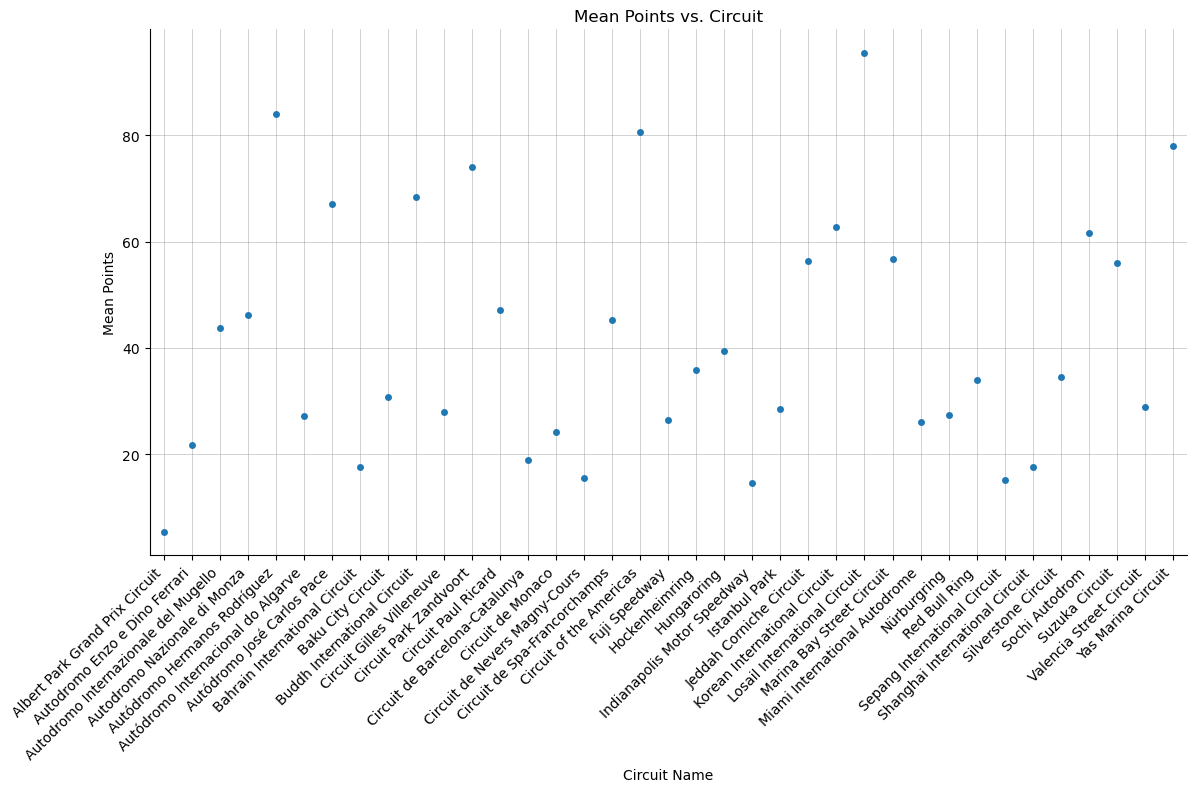

In [7]:
# We're interested in results, so we will look at mean_result_time, mean_points, and fastestLapSpeed

# Plot data for mean_points

mean_point_plot = sns.catplot(data = formula1_agg, x = "circuit_name", y = "mean_points", 
                              height = 6, aspect = 2)
plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5, alpha = 0.5)
mean_point_plot.set_xticklabels(rotation = 45, ha = 'right')

plt.title("Mean Points vs. Circuit")
plt.xlabel("Circuit Name")
plt.ylabel("Mean Points")
plt.show()


c:\Users\CatRo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


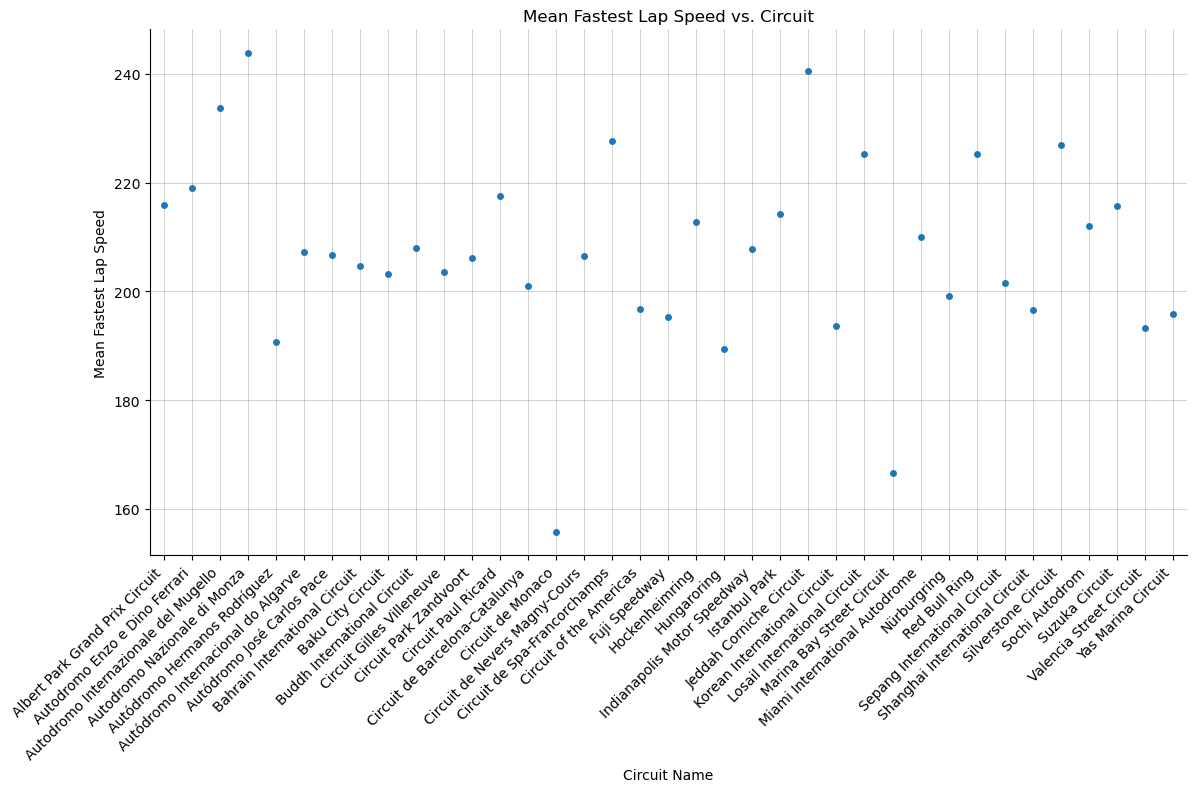

In [8]:
# plot data for mean_lap_speed

fastestLapSpeed_plot = sns.catplot(data = formula1_agg, x = "circuit_name", y = "mean_fastest_lap_speed", 
                                   height = 6, aspect = 2)
plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5, alpha = 0.5)
fastestLapSpeed_plot.set_xticklabels(rotation = 45, ha = 'right')

plt.title("Mean Fastest Lap Speed vs. Circuit")
plt.xlabel("Circuit Name")
plt.ylabel("Mean Fastest Lap Speed")
plt.show()


c:\Users\CatRo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


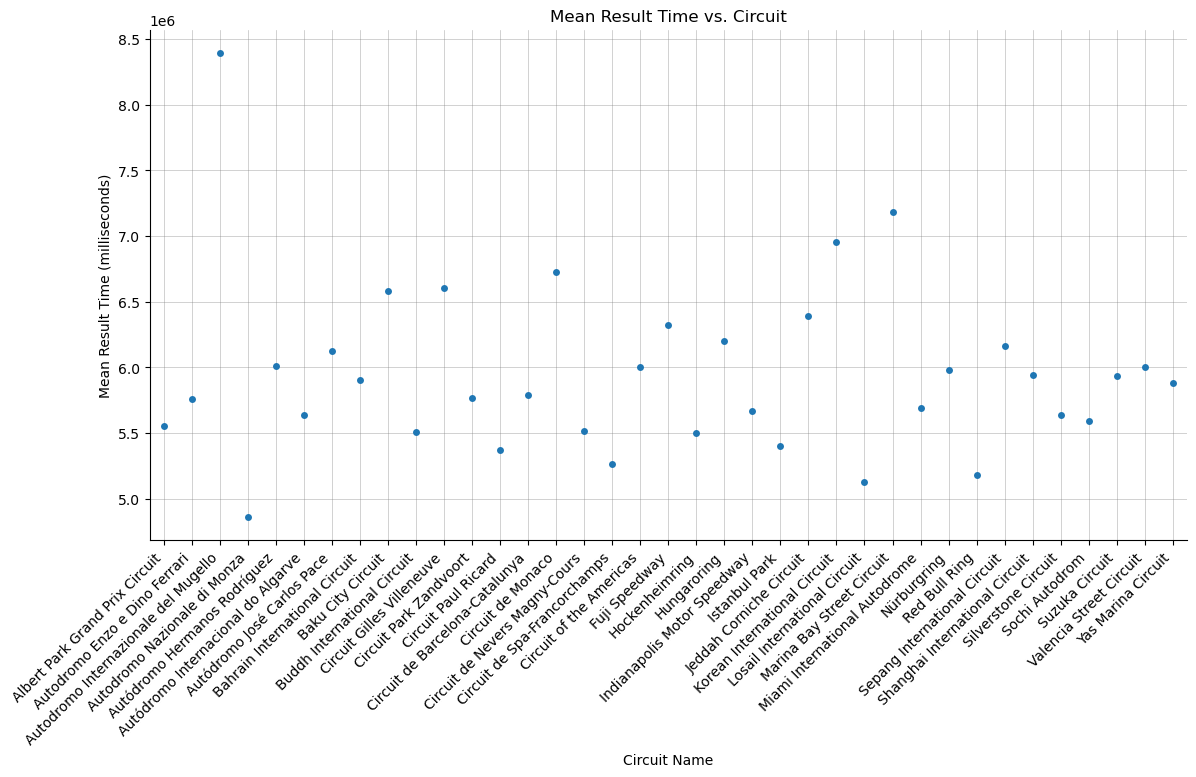

In [9]:
# plot data for mean_result_times

mean_result_time_plot = sns.catplot(data = formula1_agg, x = "circuit_name", y = "mean_result_time", 
                                    height = 6, aspect = 2)
plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5, alpha = 0.5)
mean_result_time_plot.set_xticklabels(rotation = 45, ha = 'right')

plt.title("Mean Result Time vs. Circuit")
plt.xlabel("Circuit Name")
plt.ylabel("Mean Result Time (milliseconds)")
plt.show()


<font size = "3">

From these plots, we noticed that there are similar trends between the fastest lap speed and result time scatterplots. The mean fastest lap speed vs. circuit graph shows Autodromo Nazionale di Monza, Jeddah Corniche Circuit, Autodromo Internazionale del Mugello, Circuit de Spa-Francorchamps, Losail International Circuit, and Red Bull Ring as having the fastest lap speed. When observing the mean result time vs. circuit graph, we also see Autodromo Nazionale di Monza, Losail International Circuit, Red Bull Ring, and Circuit de Spa-Francorchamps as being the circuits at which drivers finished in the shortest amount of time. 

The mean points vs. circuit graph shows us a slightly different trend. Like the fastest lap speed and result time scatterplots, this plot also illustrates that the Losail International Circuit is the circuit at which drivers have the largest average number of points. However, we also see the rise of Autodromo Hermanos Rodriguez, Circuit of the Americas, and the Yas Marina Circuit as being circuits that see a large mean number of points. 

## Discussion

### Summary of Findings

<font size = "3">

In this analysis, we found that, based on the Formula 1 dataset, the Losail International Circuit is currently the circuit hosting the best races. Across all three metrics used to characterize "best", the Losail International Circuit was consistently ranked within the top five of each category, including points, fastest lap speed, and result time (the amount of time it took each driver to finish the race). In particular, the Losail International Circuit dominated the mean number of points and had drivers with the fastest result times and fastest lap speeds. Furthermore, we infer that the circuits that hold the fastest races (shortest result times) may also hold the most competitive races (fastest lap speeds and number of points). The mean fastest lap speed vs. circuit and mean result time vs. circuit scatterplots both showed similar results, as circuits that had drivers with the shortest result time also tended to have drivers with the fastest lap speed. This points to a correlation between lap speed and result/race finish time. From our analysis, we see that these fastest and most competitive circuits include Autodromo Nazionale di Monza, Circuit de Spa-Francorchamps, Losail International Circuit, and the Red Bull Ring. 

However, when we observe our `formula1_agg` dataset again, we see that the Losail International Circuit has the fewest number of observations, indicating that it may be a newly-built circuit that has not hosted many races. Given the advancements in technology over the years, it seems obvious that if the Losail International Circuit was built recently, it would have the fastest lap speeds and the shortest result times, since many of the drivers would have mastered techniques to drive faster. 

In the future, we would like to improve our work by studying this data over the course of several decades. The data we worked with represents an average over the history of the circuit, which may lead to inaccurate analyses. By including time, we would be able to better predict future winners of the Formula 1 races. 